In [1]:
using Distributions
using HypothesisTests
using Random
using StatsBase
using StatsPlots
default(fmt=:png, titlefontsize=10, tickfontsize=6, guidefontsize=8, legendfontsize=8)

In [2]:
function sim_ttests(distX, distY, m, n; L=10^5)
    pval_evt = Vector{Float64}(undef, L)
    pval_uvt = similar(pval_evt)
    pval_mwu = similar(pval_evt)
    tmpX = [Vector{Float64}(undef, m) for _ in 1:Threads.nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        thid = Threads.threadid()
        X = rand!(distX, tmpX[thid])
        Y = rand!(distY, tmpY[thid])
        pval_evt[i] = pvalue(EqualVarianceTTest(X, Y))
        pval_uvt[i] = pvalue(UnequalVarianceTTest(X, Y))
        pval_mwu[i] = pvalue(MannWhitneyUTest(X, Y))
    end
    _ecdf_evt = ecdf(pval_evt)
    _ecdf_uvt = ecdf(pval_uvt)
    _ecdf_mwu = ecdf(pval_mwu)
    ecdf_evt(x) = _ecdf_evt(x)
    ecdf_uvt(x) = _ecdf_uvt(x)
    ecdf_mwu(x) = _ecdf_mwu(x)
    ecdf_evt, ecdf_uvt, ecdf_mwu
end

distname(dist) = replace(string(dist), r"{[^}]*}"=>"")

function plot_ttests(distX, distY, m, n; L=10^5)
    @show distX distY
    @show m, n
    @show median(distX), median(distY)
    @show mean(distX), mean(distY)
    @show std(distX), std(distY)
    ecdf_evt, ecdf_uvt, ecdf_mwu = sim_ttests(distX, distY, m, n; L)
    plot()
    plot!(ecdf_evt, 0, 0.1; label="Student t-test")
    plot!(ecdf_uvt, 0, 0.1; label="Welch t-test", ls=:dash)
    plot!(ecdf_mwu, 0, 0.1; label="Mann-Whitney U-test", ls=:dashdot)
    plot!([0, 0.1], [0, 0.1]; label="", ls=:dot, lw=0.5, c=:black)
    plot!(xtick=0:0.01:1, ytick=0:0.01:1)
    plot!(xguide="nominal significance level α", yguide="probability of p-value ≤ α")
    plot!(size=(400, 400))
end

plot_ttests (generic function with 1 method)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = Normal{Float64}(μ=0.0, σ=1.0)
(m, n) = (100, 200)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


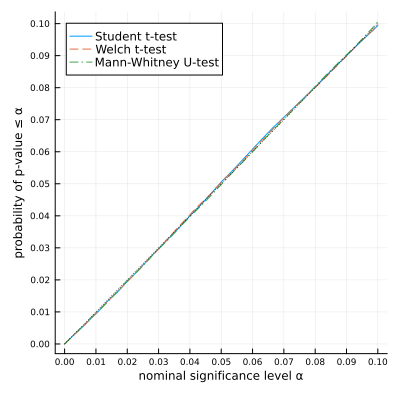

In [3]:
distX, distY = Normal(0, 1), Normal(0, 1)
m, n = 100, 200
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = Normal{Float64}(μ=0.0, σ=4.0)
(m, n) = (100, 100)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 4.0)


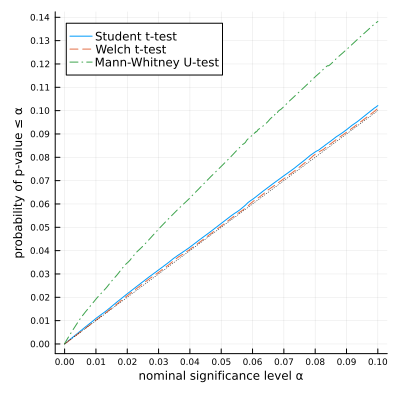

In [4]:
distX, distY = Normal(0, 1), Normal(0, 4)
m, n = 100, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = Normal{Float64}(μ=0.0, σ=4.0)
(m, n) = (200, 100)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 4.0)


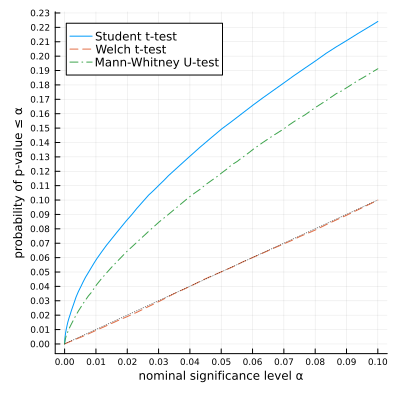

In [5]:
distX, distY = Normal(0, 1), Normal(0, 4)
m, n = 200, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.21821789023599247
ρ: TDist{Float64}(ν=2.1)
)

(m, n) = (100, 100)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


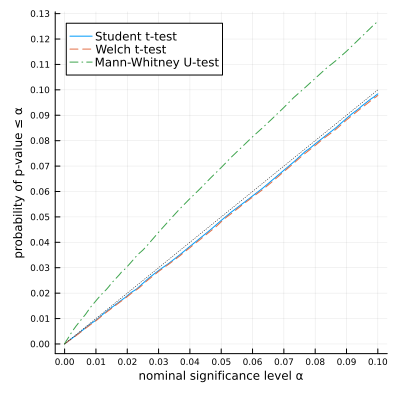

In [6]:
ν = 2.1
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.21821789023599247
ρ: TDist{Float64}(ν=2.1)
)

(m, n) = (100, 200)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


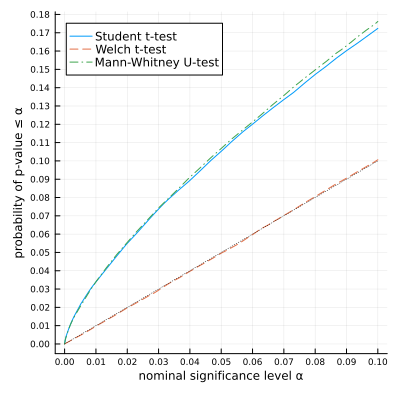

In [7]:
ν = 2.1
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 200
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.21821789023599247
ρ: TDist{Float64}(ν=2.1)
)

(m, n) = (100, 400)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


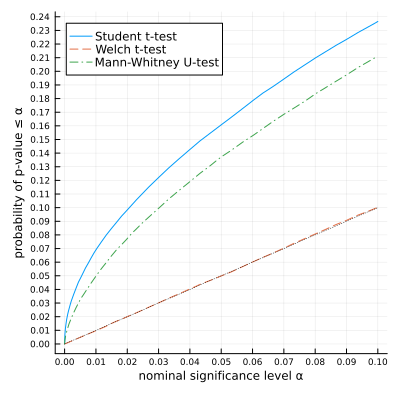

In [8]:
ν = 2.1
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 400
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.21821789023599247
ρ: TDist{Float64}(ν=2.1)
)

(m, n) = (100, 1000)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


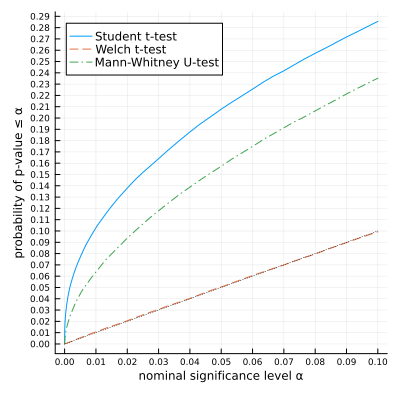

In [9]:
ν = 2.1
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 1000
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.5773502691896258
ρ: TDist{Float64}(ν=3.0)
)

(m, n) = (100, 100)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


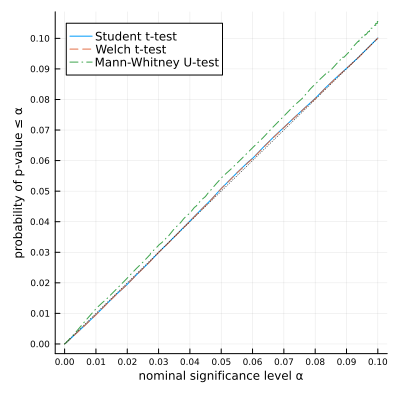

In [10]:
ν = 3
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.5773502691896258
ρ: TDist{Float64}(ν=3.0)
)

(m, n) = (100, 200)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


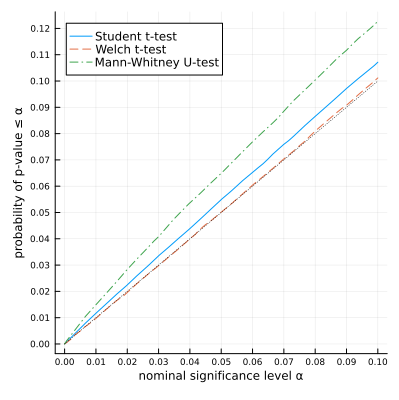

In [11]:
ν = 3
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 200
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.5773502691896258
ρ: TDist{Float64}(ν=3.0)
)

(m, n) = (100, 400)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


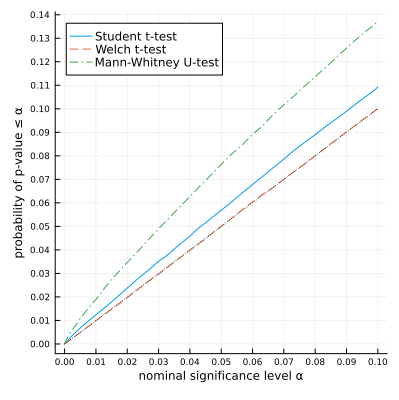

In [12]:
ν = 3
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 400
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.5773502691896258
ρ: TDist{Float64}(ν=3.0)
)

(m, n) = (100, 1000)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


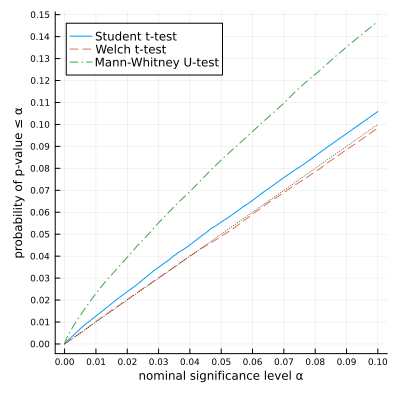

In [13]:
ν = 3
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 1000
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.7071067811865475
ρ: TDist{Float64}(ν=4.0)
)

(m, n) = (100, 100)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


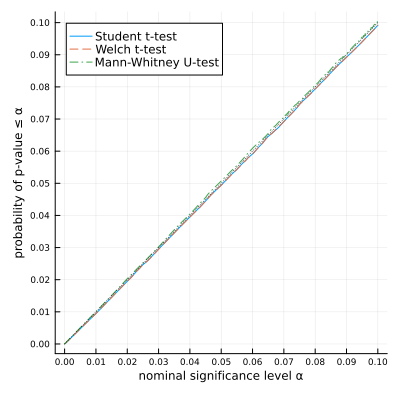

In [14]:
ν = 4
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.7071067811865475
ρ: TDist{Float64}(ν=4.0)
)

(m, n) = (100, 200)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


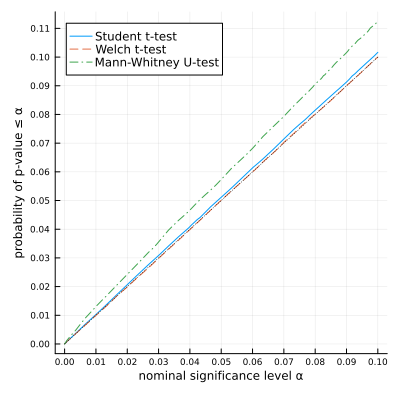

In [15]:
ν = 4
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 200
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.7071067811865475
ρ: TDist{Float64}(ν=4.0)
)

(m, n) = (100, 400)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


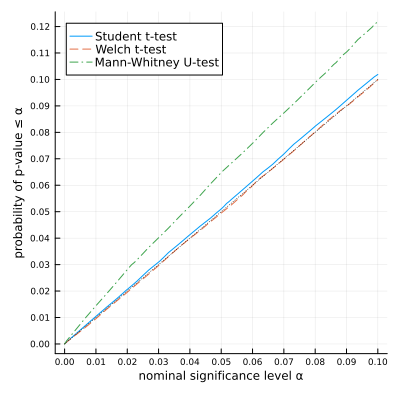

In [16]:
ν = 4
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 400
plot_ttests(distX, distY, m, n; L=10^5)

distX = Normal{Float64}(μ=0.0, σ=1.0)
distY = LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 0.0
σ: 0.7071067811865475
ρ: TDist{Float64}(ν=4.0)
)

(m, n) = (100, 1000)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (0.0, 0.0)
(std(distX), std(distY)) = (1.0, 1.0)


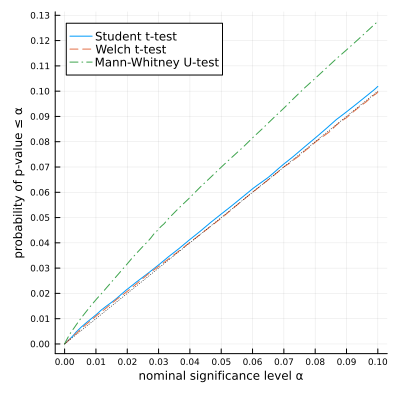

In [17]:
ν = 4
distX, distY = Normal(0, 1), TDist(ν)/std(TDist(ν))
m, n = 100, 1000
plot_ttests(distX, distY, m, n; L=10^5)

distX = TDist{Float64}(ν=1.0)
distY = TDist{Float64}(ν=1.0)
(m, n) = (100, 100)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (NaN, NaN)
(std(distX), std(distY)) = (NaN, NaN)


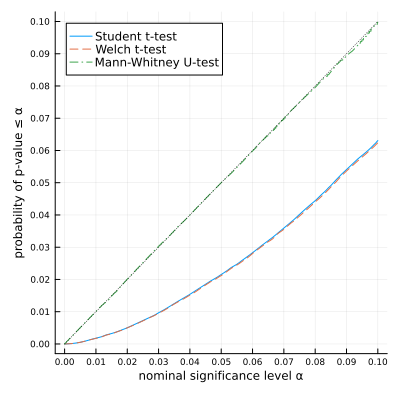

In [18]:
ν = 1
distX, distY = TDist(ν), TDist(ν)
m, n = 100, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = TDist{Float64}(ν=1.0)
distY = TDist{Float64}(ν=1.0)
(m, n) = (100, 200)
(median(distX), median(distY)) = (0.0, 0.0)
(mean(distX), mean(distY)) = (NaN, NaN)
(std(distX), std(distY)) = (NaN, NaN)


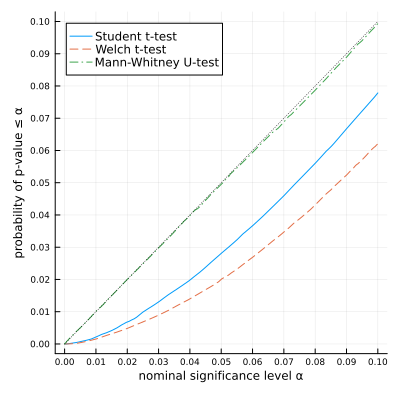

In [19]:
ν = 1
distX, distY = TDist(ν), TDist(ν)
m, n = 100, 200
plot_ttests(distX, distY, m, n; L=10^5)

distX = LogNormal{Float64}(μ=0.0, σ=1.0)
distY = LogNormal{Float64}(μ=0.0, σ=1.0)
(m, n) = (100, 100)
(median(distX), median(distY)) = (1.0, 1.0)
(mean(distX), mean(distY)) = (1.6487212707001282, 1.6487212707001282)
(std(distX), std(distY)) = (2.1611974158950877, 2.1611974158950877)


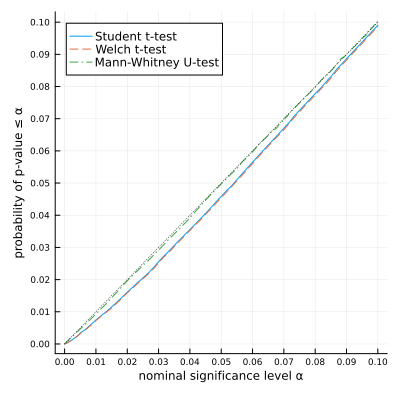

In [20]:
distX, distY = LogNormal(), LogNormal()
m, n = 100, 100
plot_ttests(distX, distY, m, n; L=10^5)

distX = LogNormal{Float64}(μ=0.0, σ=1.0)
distY = LogNormal{Float64}(μ=0.0, σ=1.0)
(m, n) = (100, 400)
(median(distX), median(distY)) = (1.0, 1.0)
(mean(distX), mean(distY)) = (1.6487212707001282, 1.6487212707001282)
(std(distX), std(distY)) = (2.1611974158950877, 2.1611974158950877)


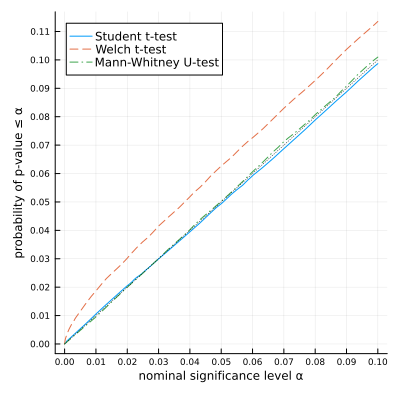

In [21]:
distX, distY = LogNormal(), LogNormal()
m, n = 100, 400
plot_ttests(distX, distY, m, n; L=10^5)